In [1]:
import pandas as pd
import datasist as ds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [1]:
%cd ../../src

c:\Users\Miguel Senra\Documents\Programming\Master-Degree-Research\src


In [4]:
# This is data cointaining all apolar molecules
all_df = pd.read_csv("../data/processed/processed_apolar.csv")
partial_df = pd.read_csv("../data/final/final_apolar.csv")

# All 20 Molecules

In [5]:
from sklearn.svm import SVR
from utils.evaluation import show_metrics

x0 = all_df.drop(['Molecule', 'Formula','Expt'],axis=1)
y0 = all_df[['Expt']]

show_metrics(SVR(kernel = 'linear'), x0, y0, 5)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Test Scores: [0.88719994 0.25540071 0.0473333  0.24573488 0.13862077]
Mean Test Scores: 0.31
Std of Scores: 0.3
Min and Max of Scores: 0.05, 0.89

Train Score: 0.29



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [6]:
from sklearn.linear_model import LinearRegression
show_metrics(LinearRegression(), x0, y0, 5)

Test Scores: [0.76552318 0.28519958 0.08337337 1.26057673 0.08259003]
Mean Test Scores: 0.5
Std of Scores: 0.46
Min and Max of Scores: 0.08, 1.26

Train Score: 0.37



In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from utils.data import log_transform

transformer = FunctionTransformer(log_transform)

numerical_transformer = ColumnTransformer([('log', transformer, [0, 1])])

svr = Pipeline([('log', numerical_transformer), ('reg', SVR(kernel='linear'))])
lin = Pipeline([('log', numerical_transformer), ('reg', LinearRegression())])

In [8]:
show_metrics(svr, x0, y0, 5)

Test Scores: [2.25845586 0.25891092 0.26553697 3.59157032 0.70932022]
Mean Test Scores: 1.42
Std of Scores: 1.31
Min and Max of Scores: 0.26, 3.59

Train Score: 1.34



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [9]:
'pi' in 'PI E OI'.lower()

True

In [10]:
show_metrics(lin, x0, y0, 5)

Test Scores: [2.18928744 0.66921514 0.33498155 1.08836665 0.325834  ]
Mean Test Scores: 0.92
Std of Scores: 0.69
Min and Max of Scores: 0.33, 2.19

Train Score: 0.77



In [11]:
# This test was just to compare if the log transform could help us, but it seens it won't

# 17 Molecules

In [12]:
partial_df

,Molecule,Formula,Ei,Alpha,Expt,axx,ayy,azz,pi_bond
0,Butane,C4H10,10.6,8.08,35,9.31,7.68,7.24,0
1,Pentane,C5H12,10.4,9.95,60,11.72,9.39,8.74,0
2,Hexane,C6H14,10.2,11.85,80,14.32,10.99,10.23,0
3,Heptane,C7H16,9.9,13.76,105,16.91,12.66,11.72,0
4,Octane,C8H18,10.0,15.68,115,19.60,14.26,13.19,0
5,Nonane,C9H20,10.0,16.75,145,21.31,14.93,14.01,0
6,Ethylene,C2H4,10.5,4.18,20,5.43,3.77,3.35,1
7,Cyclopropane,C3H6,9.9,5.51,10,5.75,5.75,5.04,0
8,Cyclohexane,C6H12,9.9,10.79,80,11.29,11.29,9.78,0
9,Benzene,C6H6,9.3,10.40,150,12.27,12.27,6.67,3


OptionError: "No such keys(s): 'mode.use_inf_as_null'"

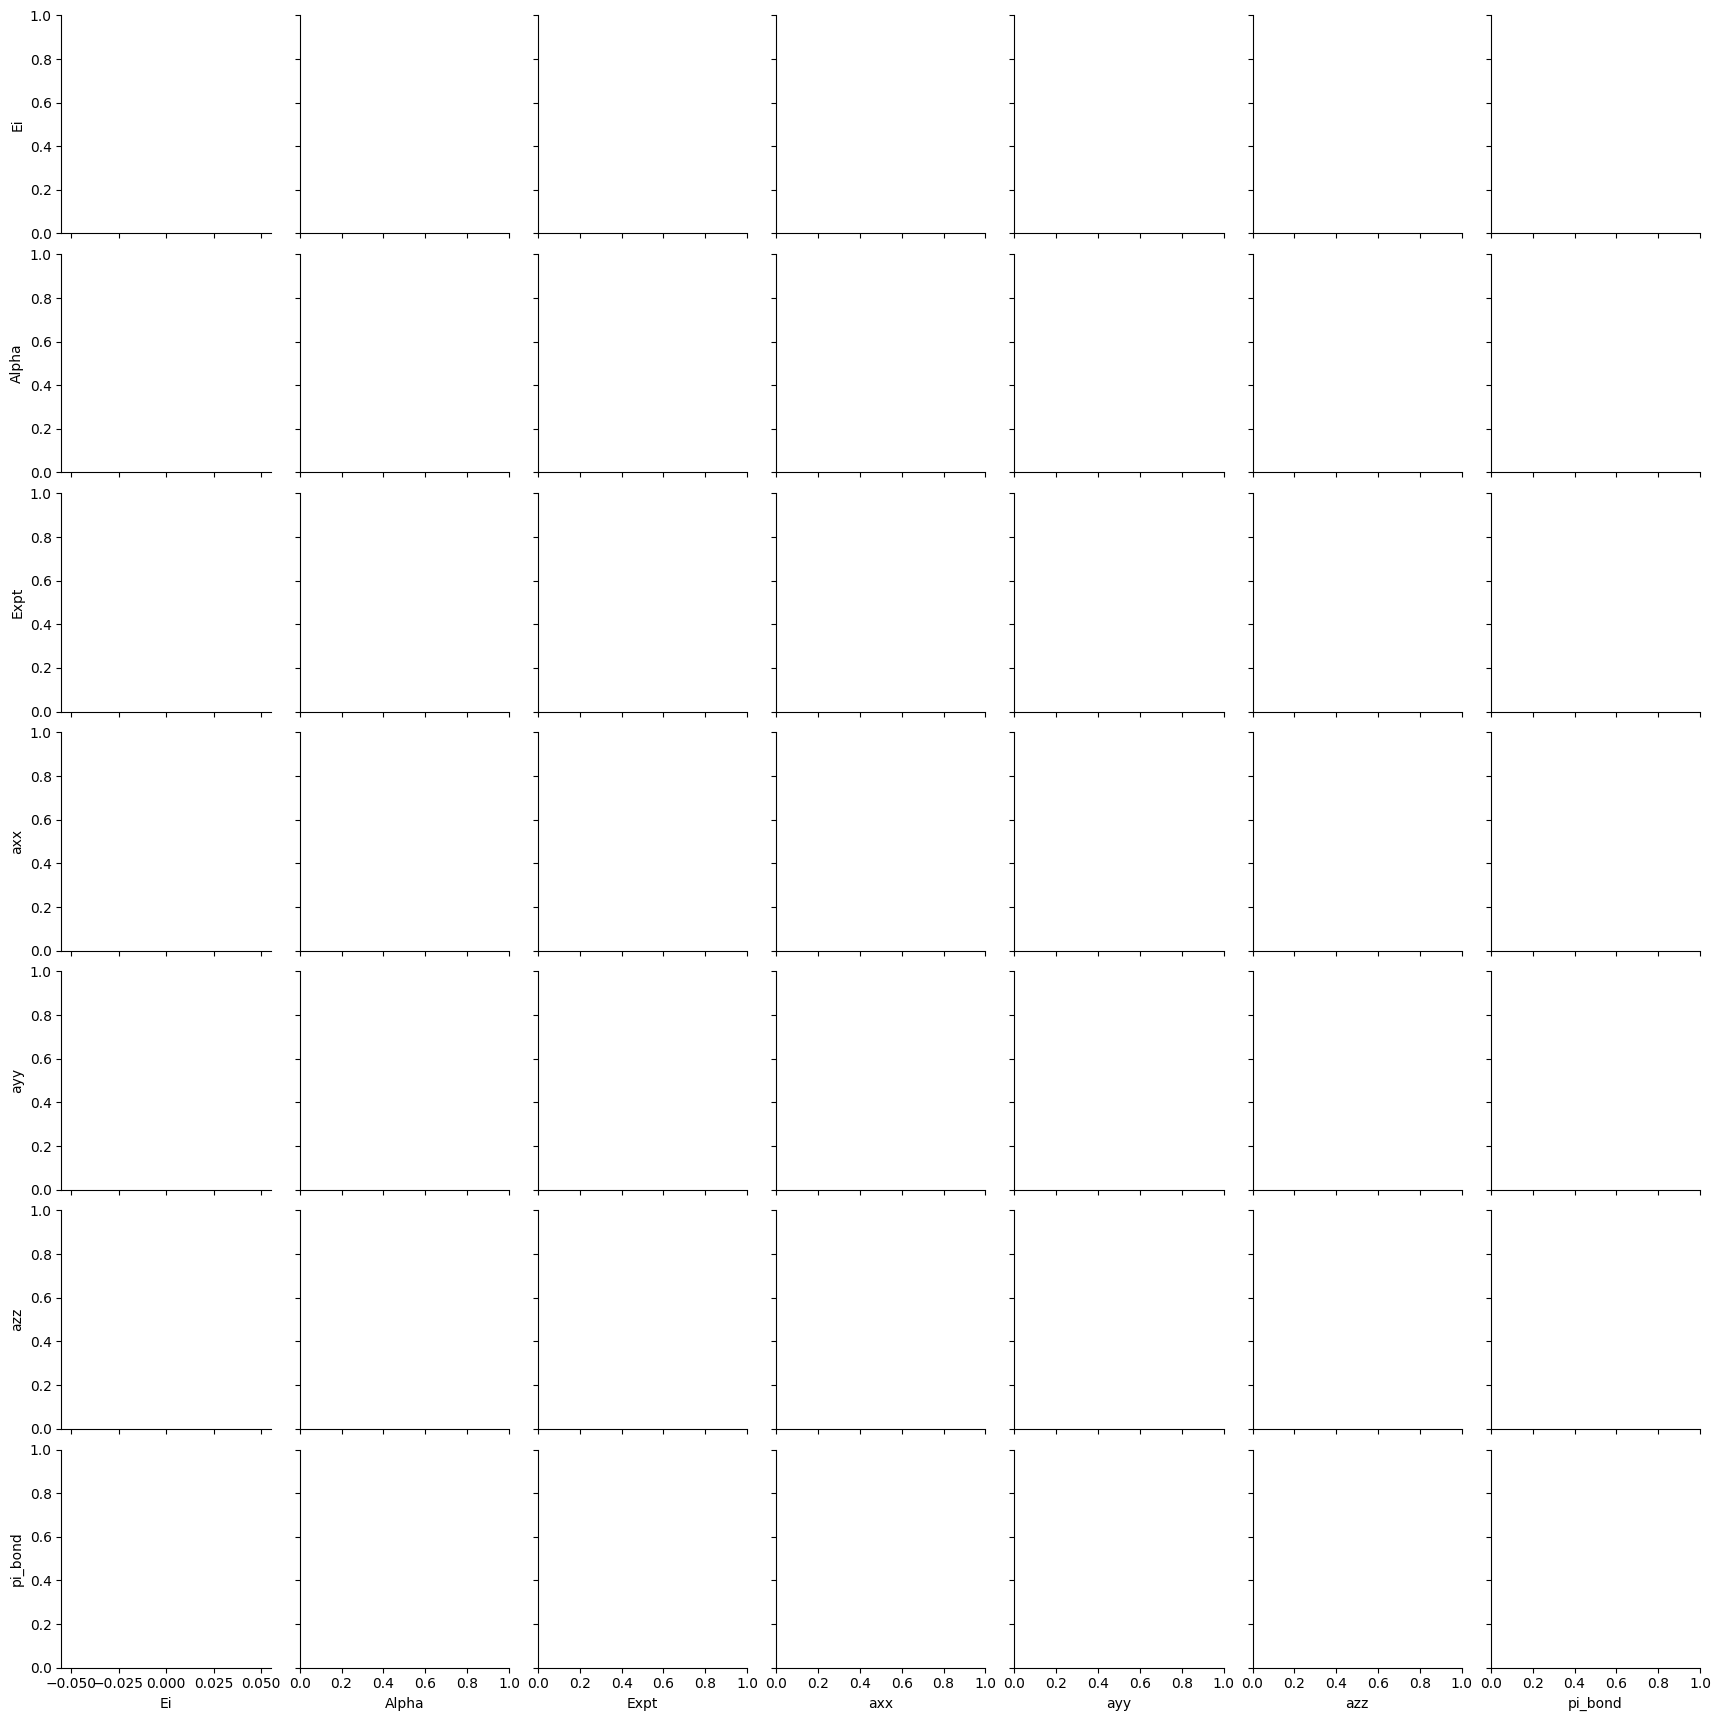

In [14]:
sns.pairplot(partial_df)

In [ ]:
# Since axx, ayy and azz are already normal we are not transforming them.

# Nested-CV Performances

In [15]:
%ls

__init__.py  __pycache__/  utils/


In [16]:
# Apolar
df_test_scores_apolar_all = pd.read_csv("../performances/apolar/all_test_score.csv")
df_test_scores_apolar_partial_iso = pd.read_csv("../performances/apolar/partial_iso_test_score.csv")
df_test_scores_apolar_partial_aniso = pd.read_csv("../performances/apolar/partial_aniso_test_score.csv")

list_of_df_apolar = [
    df_test_scores_apolar_all,
    df_test_scores_apolar_partial_iso,
    df_test_scores_apolar_partial_aniso
]

# Polar
df_test_scores_polar_all = pd.read_csv("../performances/polar/all_test_score.csv")
df_test_scores_polar_partial_iso = pd.read_csv("../performances/polar/partial_iso_test_score.csv")
df_test_scores_polar_partial_aniso = pd.read_csv("../performances/polar/partial_aniso_test_score.csv")

list_of_df_polar = [
    df_test_scores_polar_all,
    df_test_scores_polar_partial_iso,
    df_test_scores_polar_partial_aniso
]

# Polar + Apolar
df_test_scores_polar_apolar_all = pd.read_csv("../performances/polar_apolar/all_test_score.csv")
df_test_scores_polar_apolar_partial_iso = pd.read_csv("../performances/polar_apolar/partial_iso_test_score.csv")
df_test_scores_polar_apolar_partial_aniso = pd.read_csv("../performances/polar_apolar/partial_aniso_test_score.csv")

list_of_df_polar_apolar = [
    df_test_scores_polar_apolar_all,
    df_test_scores_polar_apolar_partial_iso,
    df_test_scores_polar_apolar_partial_aniso
]

In [17]:
list(df_test_scores_apolar_all.columns)

['Ei + Alpha + Pi', 'Ei + Alpha', 'Pi + Ei', 'Pi + Alpha']

In [18]:
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

In [19]:
print(f"I{get_sub('p')}")

Iₚ


In [20]:
def create_fast_graph(df, y='Relative Error',palette='hls', title='Title', 
                      show_values=True, show_mean=True,figsize=(12,6), isotropy = True):
    columns = list(df.columns)
    for i in range(len(columns)):
        if 'Alpha' in columns[i]:
            if isotropy:
                columns[i]= columns[i].replace('Alpha', 'Isotropy')
            else:
                columns[i]= columns[i].replace('Alpha', 'Anisotropy')
                
    hue = columns
    models_name = list(df.index)
    
    list_of_errors = []
    for i in df.columns:
        list_of_errors.append(df[i].values)

    model_list = []
    hue_list = []
    errors = []
    aux_model = models_name.copy()

    if show_mean:
        aux_model.append('Mean Error')

    for i in list_of_errors:
        errors.extend(i)
        if show_mean:
            errors.append(np.mean(i))
    

    while len(model_list) < len(errors):
        model_list.extend(aux_model)
  
  
    j=0
    while len(hue_list) < len(errors):
        hue_list.extend([hue[j]]*len(aux_model))
        j = (j+1) % len(hue)
  
    dict_sns = {
      f'{y}':errors,
      'Model':model_list,
      'Feat_Comparison':hue_list
    }

    plt.figure(figsize=figsize)
    ax = sns.barplot(data=dict_sns,x='Model',y=y,hue='Feat_Comparison', palette = palette)
        
    ax.set_xlabel("Models")
    ax.set_ylabel(f"{y}")
    ax.set_title('')

    if show_values:
        for p in ax.patches:
            ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                textcoords='offset points')
    sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=len(hue), title=None, frameon=False,
)

def plot_all_fast_graphs(list_of_df):
    count = 0
    for i in list_of_df:
        if count == 2:
            create_fast_graph(i, isotropy=False)
        else:
            create_fast_graph(i)
        count += 1

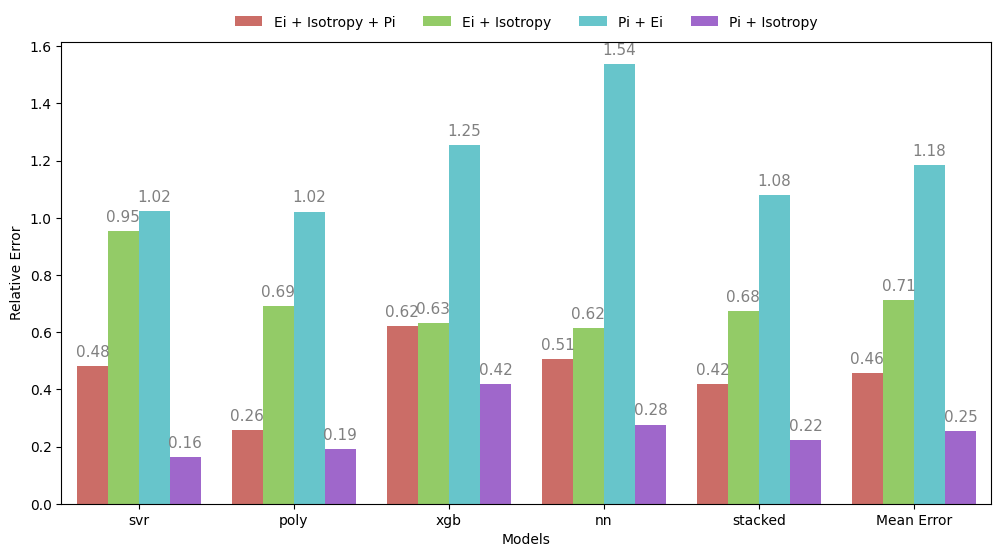

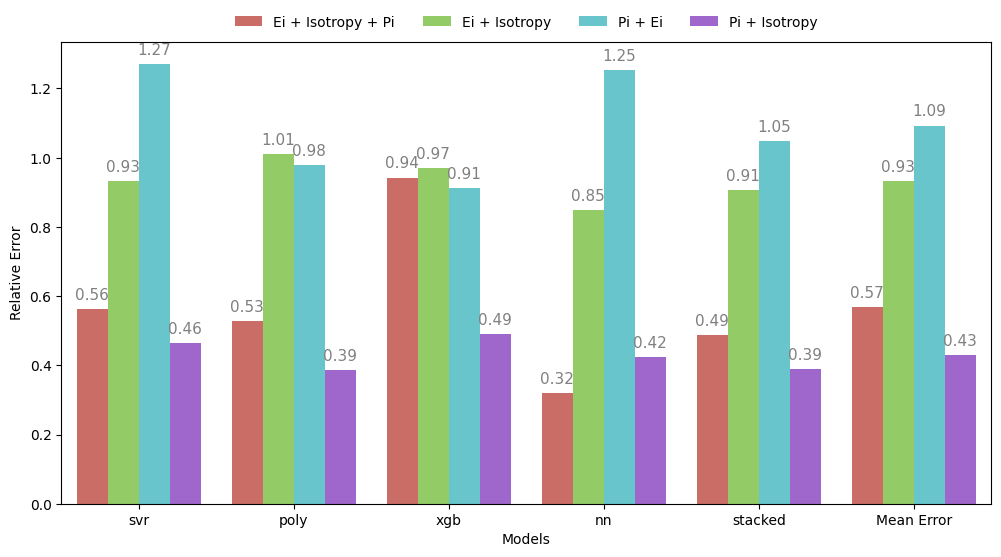

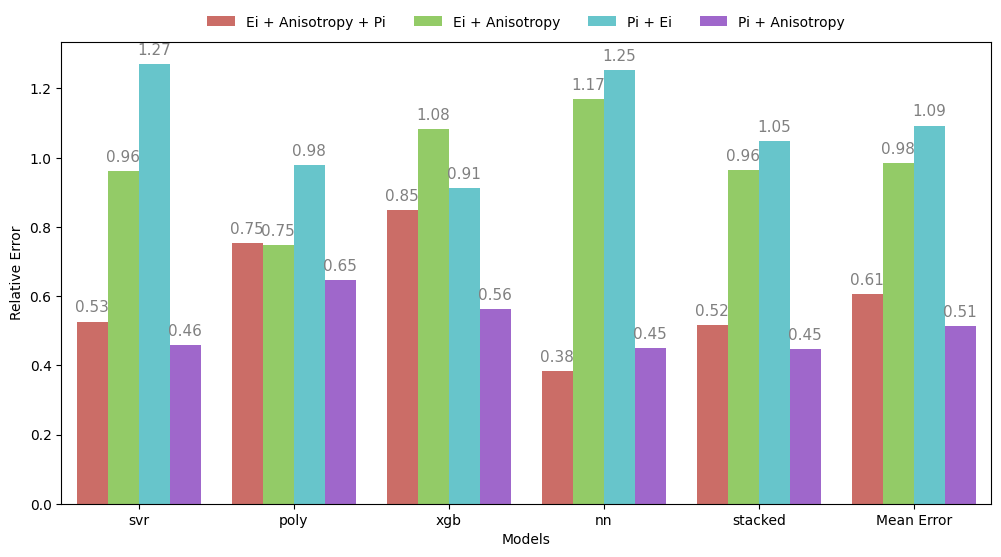

In [21]:
plot_all_fast_graphs(list_of_df_apolar)

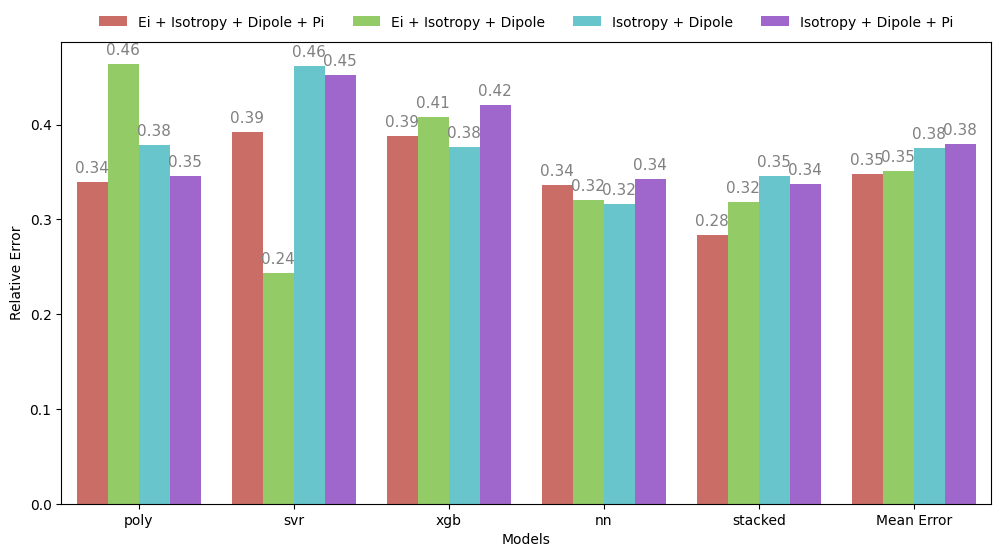

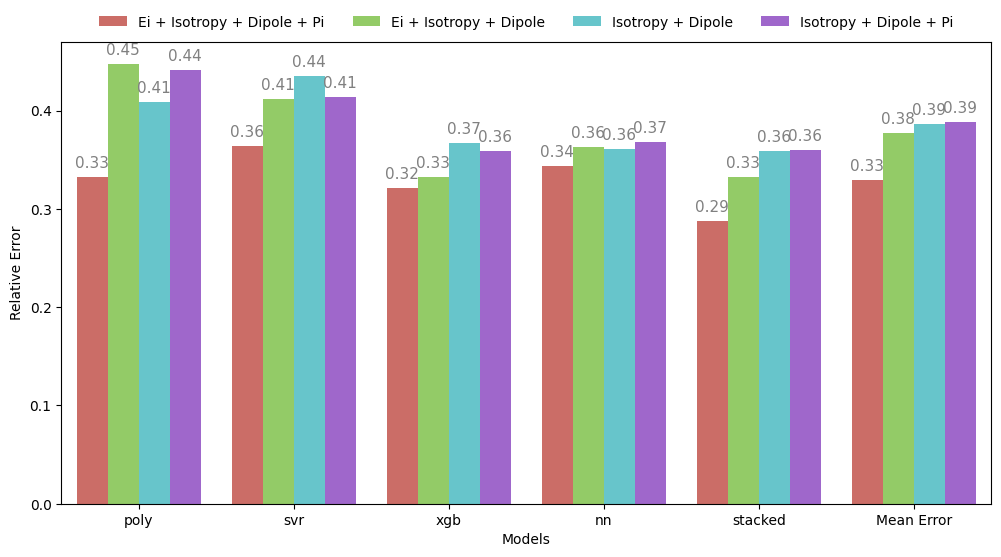

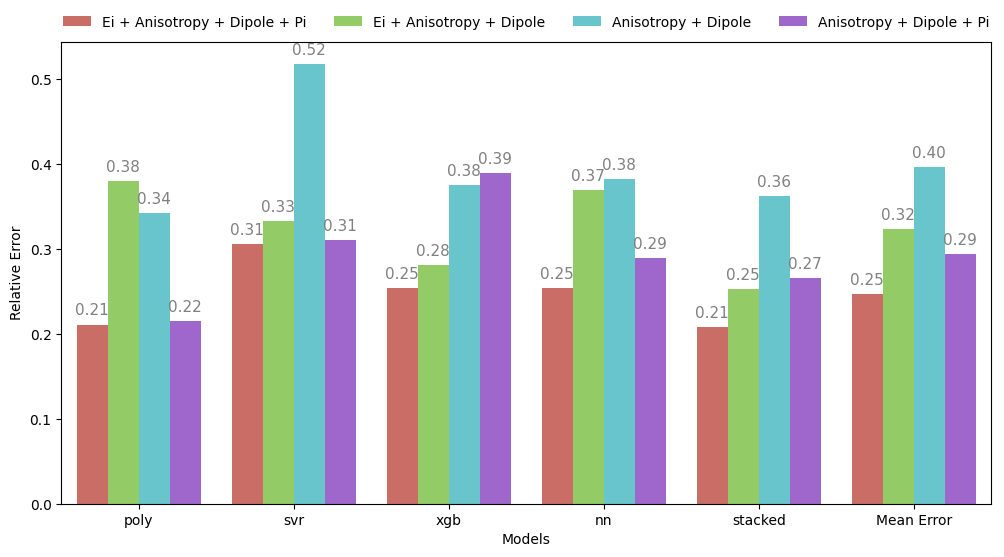

In [22]:
plot_all_fast_graphs(list_of_df_polar)

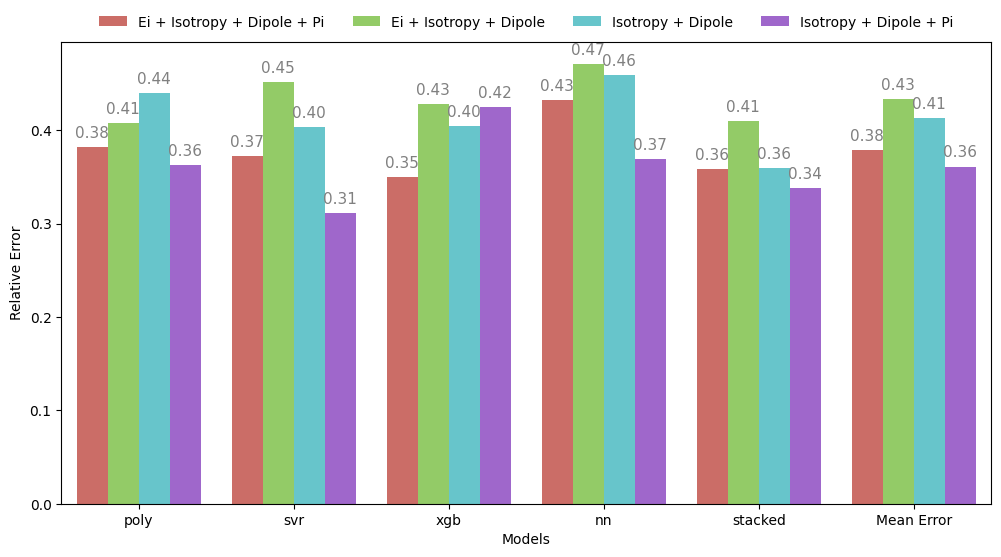

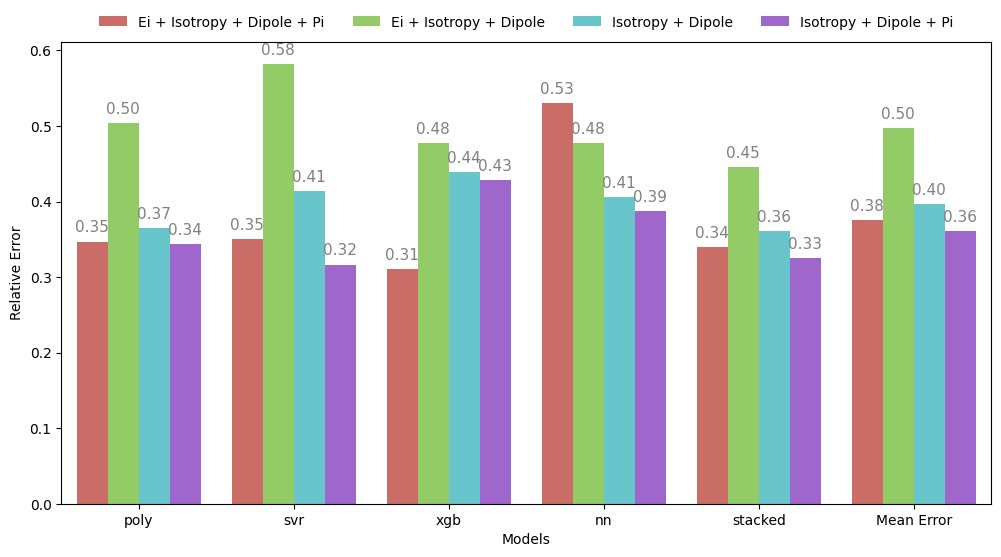

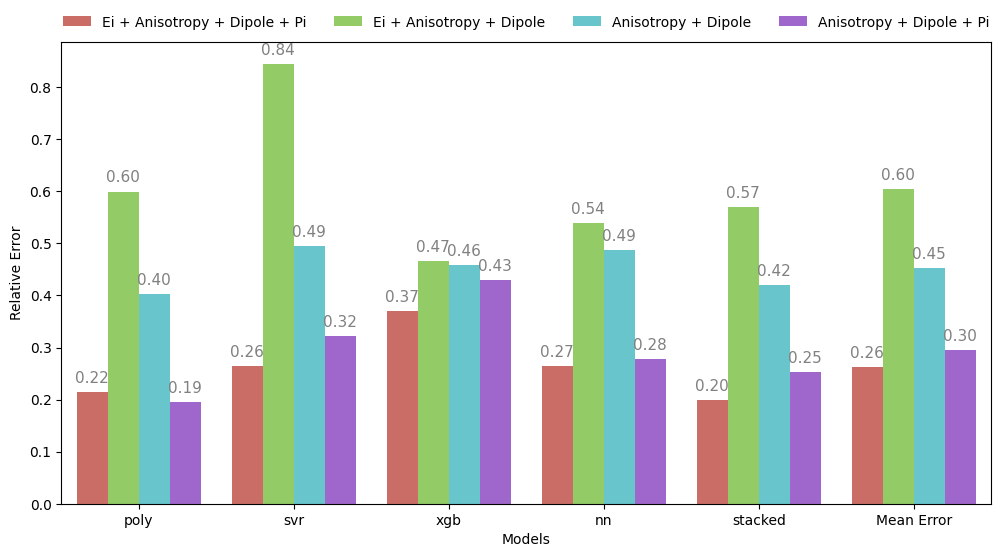

In [23]:
plot_all_fast_graphs(list_of_df_polar_apolar)

# Predicting New Apolar Molecules

In [24]:
molecules = ['Hexafluorobenzene', 'Phosphorus Chloride', 'Cyclodecane','Bicyclodecane',
'1,3,5-hexatriene', 'Carbon Tetrabrom']

formula = ['C6F6', 'Cl3P','C10H20','C10H18','C6H8','CBr4']

Ei = [9.9,9.9,10,9.4,8.3,10.3]

alpha = [9.8,12.8,18.5,17.7,11.2,15.3]

pi_bond = [3, 0, 0, 0, 3, 0]

dys = [141,89,160,151,69,120]

paulopred = [84,98,159,215,71,123]

other_molecules = {
    'Molecule':molecules,
    'Formula':formula,
    'Ei':Ei,
    'Alpha':alpha,
    'pi_bond':pi_bond,
    'DYS':dys,
    'Paulo Pred':paulopred
}

other_molecules = pd.DataFrame(other_molecules)
other_molecules

,Molecule,Formula,Ei,Alpha,pi_bond,DYS,Paulo Pred
0,Hexafluorobenzene,C6F6,9.9,9.8,3,141,84
1,Phosphorus Chloride,Cl3P,9.9,12.8,0,89,98
2,Cyclodecane,C10H20,10.0,18.5,0,160,159
3,Bicyclodecane,C10H18,9.4,17.7,0,151,215
4,"1,3,5-hexatriene",C6H8,8.3,11.2,3,69,71
5,Carbon Tetrabrom,CBr4,10.3,15.3,0,120,123


In [45]:
import pickle
apolar_models = pickle.load(open("../models/apolar/pi_alpha/all_molecules_models.sav", 'rb'))
svr_apolar = apolar_models[1]

In [46]:
svr_apolar.fit(x0[['Alpha', 'pi_bond']].values, y0.values.ravel())


TransformedTargetRegressor(regressor=Pipeline(steps=[('scale',
                                                      ColumnTransformer(remainder='passthrough',
                                                                        transformers=[('scale',
                                                                                       StandardScaler(),
                                                                                       slice(0, -1, None))])),
                                                     ('reg',
                                                      SVR(C=2.195273249506252,
                                                          degree=10,
                                                          epsilon=0.01,
                                                          max_iter=10000))]),
                           transformer=StandardScaler())

In [47]:
y_pred_train = svr_apolar.predict(x0[['Alpha', 'pi_bond']].values)

all_df['Miguel Pred'] = np.int32(np.round(y_pred_train))
all_df['Error'] = all_df['Expt'] - all_df['Miguel Pred']
all_df

,Molecule,Formula,Ei,Alpha,Expt,pi_bond,Miguel Pred,Error
0,Butane,C4H10,10.6,8.10,35,0,36,-1
1,Pentane,C5H12,10.4,10.00,60,0,58,2
2,Hexane,C6H14,10.2,11.80,80,0,81,-1
3,Heptane,C7H16,9.9,13.70,105,0,104,1
4,Octane,C8H18,10.0,15.50,115,0,125,-10
5,Nonane,C9H20,10.0,17.40,145,0,146,-1
6,Dodecane,C12H26,9.9,22.90,220,0,214,6
7,Hexadecane,C16H34,9.9,30.30,310,0,292,18
8,Ethylene,C2H4,10.5,4.20,20,1,19,1
9,Cyclopropane,C3H6,9.9,5.70,10,0,15,-5


In [48]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(all_df['Expt'], all_df['Miguel Pred'])

0.1141664624054611

In [49]:
other_molecules_pred_svr = svr_apolar.predict(other_molecules[['Alpha', 'pi_bond']].values)


In [50]:
other_molecules['Miguel Pred'] = np.round(other_molecules_pred_svr,2)
other_molecules

,Molecule,Formula,Ei,Alpha,pi_bond,DYS,Paulo Pred,Miguel Pred
0,Hexafluorobenzene,C6F6,9.9,9.8,3,141,84,149.80
1,Phosphorus Chloride,Cl3P,9.9,12.8,0,89,98,93.01
2,Cyclodecane,C10H20,10.0,18.5,0,160,159,158.48
3,Bicyclodecane,C10H18,9.4,17.7,0,151,215,149.30
4,"1,3,5-hexatriene",C6H8,8.3,11.2,3,69,71,152.82
5,Carbon Tetrabrom,CBr4,10.3,15.3,0,120,123,122.30


In [51]:
def pbe_DYS(alpha, mu, N):
    pbe = 12.4*(alpha + 1.6*mu + 2.4*N - 5.6)
    return pbe

pbe_DYS(11.6, 0.3, 0)

80.352

# Updating Data Viz

In [5]:
%cd ../../src

c:\Users\Miguel Senra\Documents\Programming\Master-Degree-Research\src


In [22]:
%pwd

'c:\\Users\\Miguel Senra\\Documents\\Programming\\Master-Degree-Research\\src'

In [61]:
import pandas as pd
from utils.evaluation import create_fast_graph

In [62]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
df = pd.read_csv("../results/performances/apolar/all_test_score.csv")
df

,Ei + Alpha + Pi,Ei + Alpha,Pi + Ei,Pi + Alpha
svr,0.481911,0.953998,1.022430,0.161891
poly,0.256489,0.691095,1.022008,0.189870
xgb,0.619893,0.632344,1.253373,0.419054
nn,0.506159,0.615188,1.538964,0.276935
stacked,0.419828,0.675525,1.080406,0.223809


In [64]:
print(r"$\alpha$")

$\alpha$


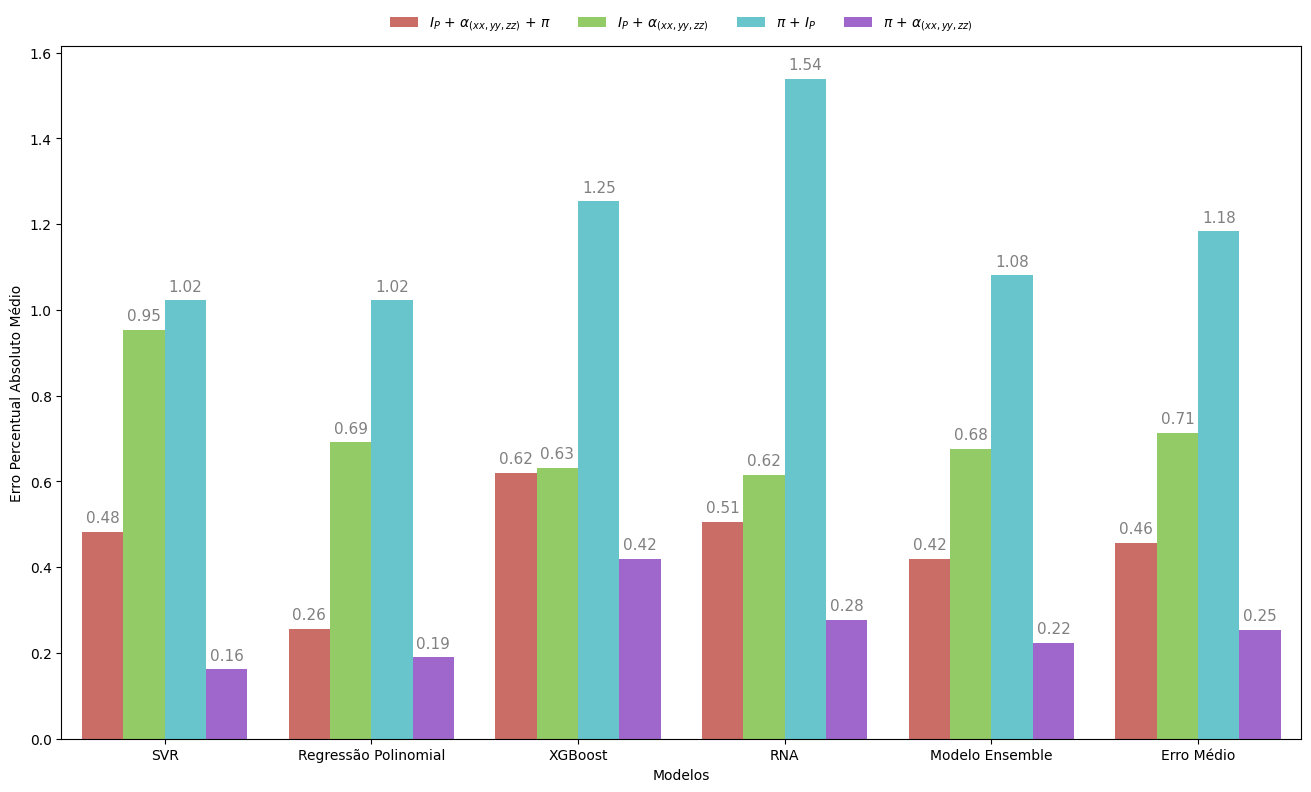

In [65]:
create_fast_graph(df, "Test", partial=True, isotropy=False)